In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


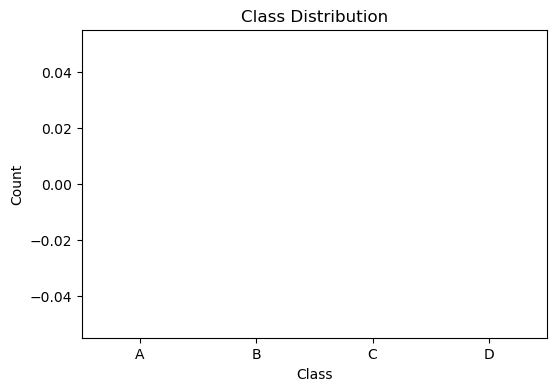

In [6]:
# Read in data
player_data_df = pd.read_csv('./combined_draft_class_with_ws_FINAL.csv')
target_col = 'WS'

# Separate target column from parameter data
X = player_data_df.drop(columns=[target_col])
y = player_data_df[target_col]

# Drop columns that are not needed
X = X.drop(columns=['Player','TS%', 'eFG%', 'Season', 'Draft Year'])

# Fill NAs (for example in '3P%')
X['3P%'] = X['3P%'].fillna(0)

# One-hot encode categorical features
X = pd.get_dummies(X, dtype=int)

# Compute quantiles for classification
quantile_90 = y.quantile(0.9)
quantile_65 = y.quantile(0.65)
quantile_30 = y.quantile(0.3)

def ws_to_grade(ws):
    if ws >= quantile_90:
        return 0  # A
    elif ws >= quantile_65:
        return 1  # B
    elif ws >= quantile_30:
        return 2  # C
    else:
        return 3  # D

y_class = y.apply(ws_to_grade)

# Split data into train/val/test
X_train_and_val, X_test, y_train_and_val, y_test = train_test_split(
    X, y_class, test_size=0.1, random_state=42, stratify=y_class
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_and_val, y_train_and_val, test_size=2/9, random_state=42, stratify=y_train_and_val
)

# 1. Check class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y_class, order=['A','B','C','D'], palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Statistical Summary of Features:


,PTS,Round,Pick,International Flag,G,GS,MP,FG,FGA,2P,...,Team_Yale,Team_Élan,Pos_C,Pos_F,Pos_G,Class_FR,Class_IN,Class_JR,Class_SO,Class_SR
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,...,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,503.141553,1.412481,15.792998,0.050228,32.724505,30.438356,1008.307763,177.414003,364.124810,138.223744,...,0.001522,0.001522,0.083714,0.435312,0.480974,0.243531,0.050228,0.203957,0.213090,0.289193
std,165.642917,0.492656,9.937138,0.218582,5.834498,8.575681,244.552107,56.653759,119.816881,52.763048,...,0.039014,0.039014,0.277169,0.496176,0.500019,0.429540,0.218582,0.403245,0.409803,0.453733
min,30.000000,1.000000,1.000000,0.000000,3.000000,0.000000,53.000000,10.000000,26.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,416.000000,1.000000,8.000000,0.000000,31.000000,30.000000,903.000000,144.000000,297.000000,101.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,509.000000,1.000000,15.000000,0.000000,34.000000,33.000000,1068.000000,182.000000,372.000000,136.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,613.000000,2.000000,23.000000,0.000000,36.000000,35.000000,1168.000000,214.000000,442.000000,174.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1068.000000,2.000000,58.000000,1.000000,41.000000,41.000000,1543.000000,346.000000,765.000000,311.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


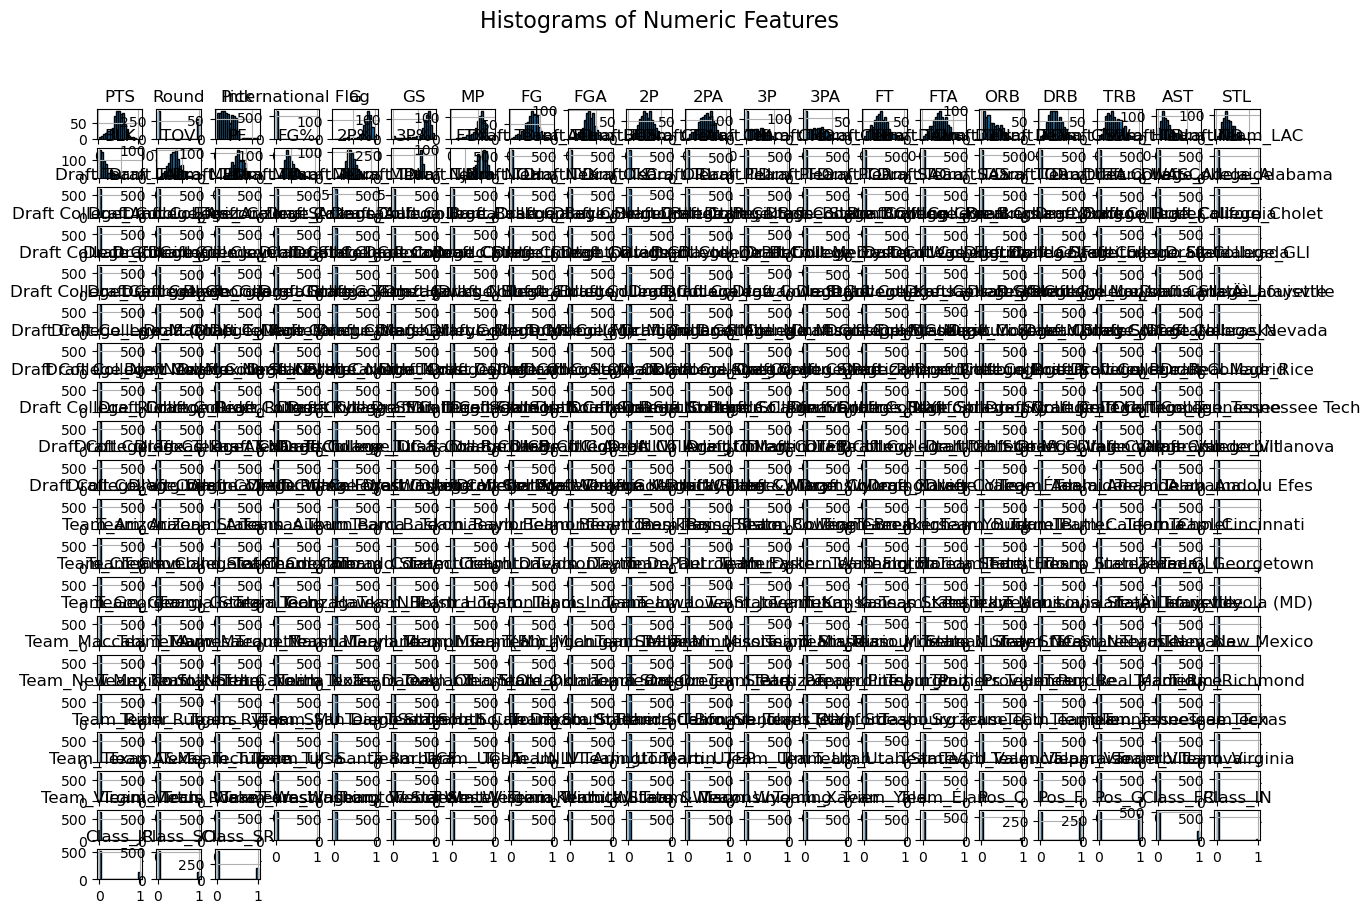

In [7]:
# 2. Examine basic statistical info of numeric features
print("Statistical Summary of Features:")
display(X.describe())

# Identify numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

# 2a. Plot histograms of numeric features
X[numeric_cols].hist(figsize=(15,10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

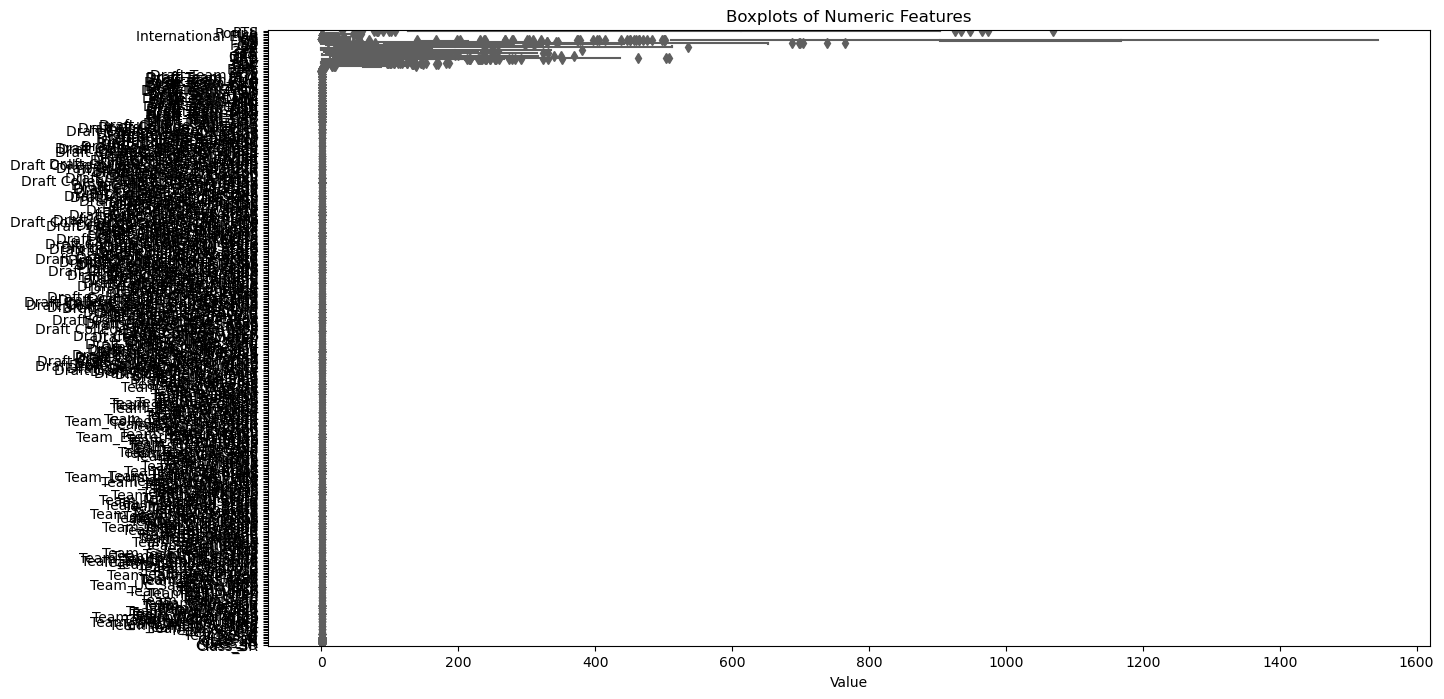

In [8]:
# 2b. Boxplots of numeric features to identify outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=X[numeric_cols], orient='h', palette='Set3')
plt.title("Boxplots of Numeric Features")
plt.xlabel("Value")
plt.show()

Correlation of features with Win Share:
ORB     0.239950
TRB     0.198404
FG%     0.191722
2P      0.181480
2P%     0.181421
BLK     0.169667
FTA     0.168665
DRB     0.151856
FT      0.141472
2PA     0.134416
GS      0.112347
PF      0.112221
STL     0.111090
FG      0.110688
G       0.104196
PTS     0.097486
MP      0.066082
TOV     0.048947
FGA     0.033979
AST    -0.008936
FT%    -0.053985
3P%    -0.079060
3P     -0.104081
3PA    -0.105659
Pick   -0.267934
dtype: float64


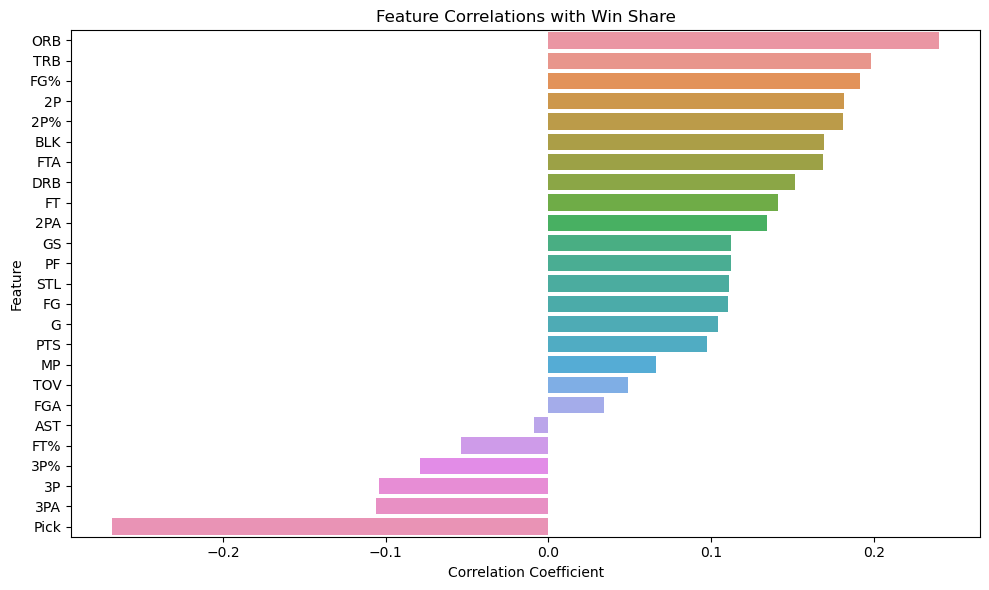

In [21]:
# 3. Feature correlation matrix
# Select only numeric columns
X_numeric = X.select_dtypes(include=[np.number])

# Exclude columns that are likely categorical (e.g., one-hot encoded)
# For simplicity, remove any column with 2 or fewer unique values.
X_numeric = X_numeric.loc[:, X_numeric.nunique() > 2]

# Compute the correlation of each numeric feature with Win Share
feature_correlations = X_numeric.corrwith(y).sort_values(ascending=False)

print("Correlation of features with Win Share:")
print(feature_correlations)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_correlations.values, y=feature_correlations.index, orient='h')
plt.title("Feature Correlations with Win Share")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


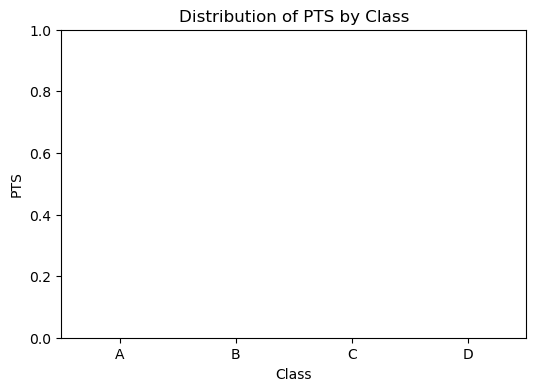

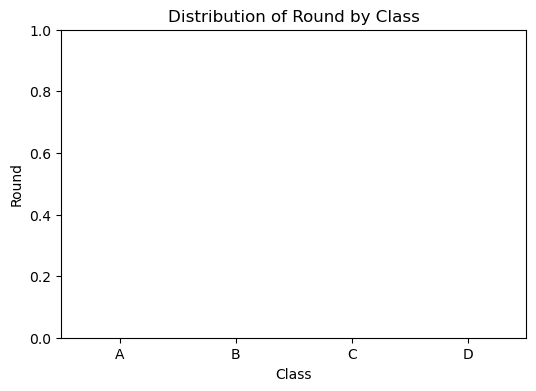

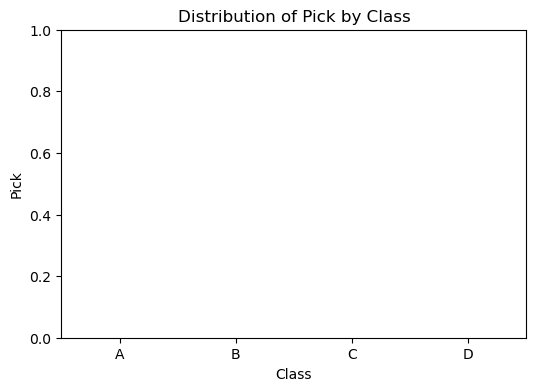

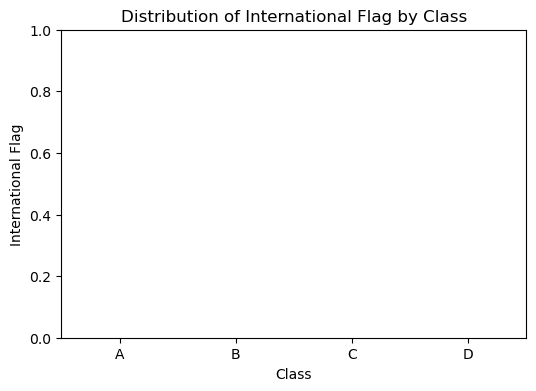

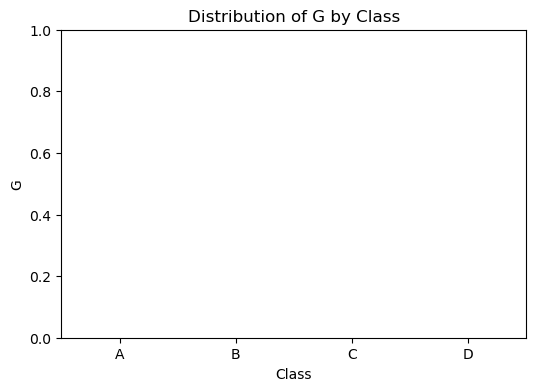

In [10]:
# 4. Feature distributions by class (violin/box plots)
# For a smaller subset of features (e.g., first 5 numeric features) to illustrate
selected_features = numeric_cols[:5]

# Convert target classes into a dataframe for plotting
df_full = X.copy()
df_full['Class'] = y_class

# 4a. Violin plots by class for selected features
for feat in selected_features:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Class', y=feat, data=df_full, order=['A','B','C','D'], palette='Set2')
    plt.title(f"Distribution of {feat} by Class")
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


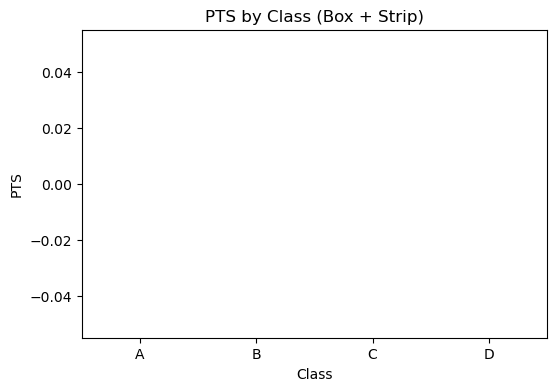

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


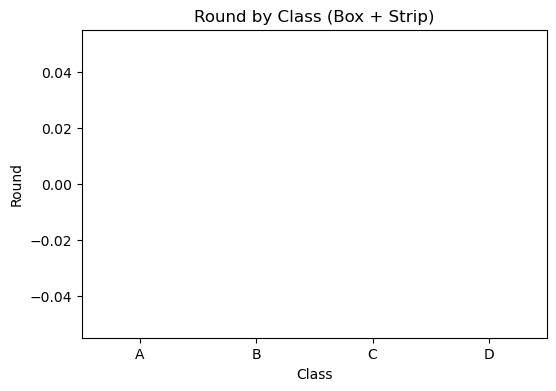

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


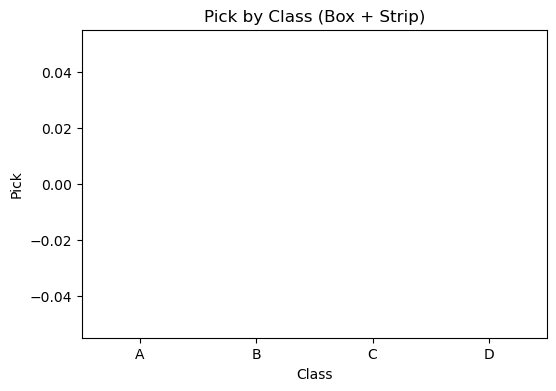

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


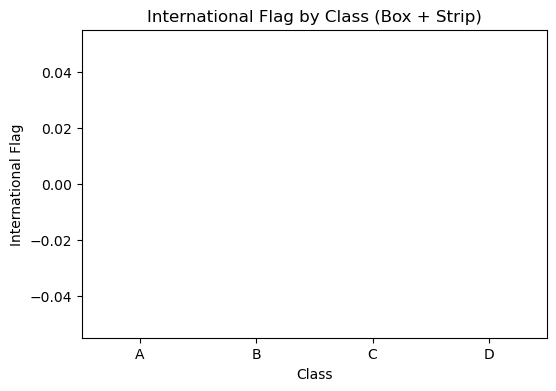

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


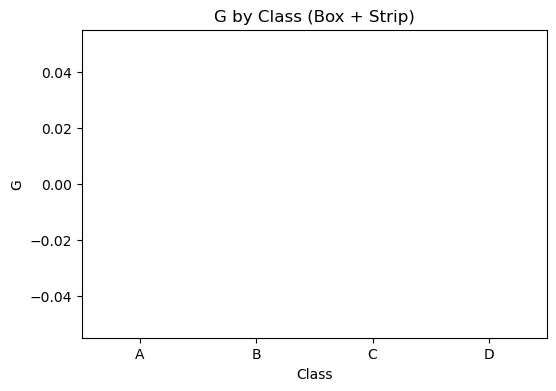

In [11]:
# 4b. Boxplots by class for selected features
for feat in selected_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Class', y=feat, data=df_full, order=['A','B','C','D'], palette='Set3')
    sns.stripplot(x='Class', y=feat, data=df_full, order=['A','B','C','D'], color='black', size=3, jitter=True, alpha=0.7)
    plt.title(f"{feat} by Class (Box + Strip)")
    plt.show()

In [ ]:
# 5. Optional: PCA for dimensionality reduction visualization
# This can help us see if classes are separable in a lower-dimensional space
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X[numeric_cols].fillna(0))  # fillna if necessary

plt.figure(figsize=(6,4))
for label in ['A', 'B', 'C', 'D']:
    plt.scatter(X_pca[y_class == label, 0], X_pca[y_class == label, 1], label=label, alpha=0.7)
plt.legend()
plt.title("PCA Projection (First 2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()